In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_excel('database/consulta_4-8-2024.xls')
df.head()

,Unnamed: 0,Qtde. Venda,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Descrição,MAR/2024,ABR/2024,MAI/2024,JUN/2024,JUL/2024,AGO/2024,Código Barras,Estoque Atual,Data Últ. Entr.,Custo c/ Imposto
1,ABACAXI UND,413,786,565,535,630,15,0000000000062,-3047,26/09/2023 - TER,1.6
2,ABOBRINHA KG,9.305,14.81,16.955,13.25,17.18,0,0000000000341,-16.71,02/08/2024 - SEX,4
3,ABRACADEIRA NYLON DISMA,0,0,0,0,0,0,7893946183202,0,21/02/2019 - QUI,11.73
4,ABRACADEIRA NYLON VONDER 100UN,0,0,0,0,0,0,7893946057114,0,07/07/2022 - QUI,4.35


In [20]:
#  transform first row into the columns
df.columns = df.iloc[0]
df = df[1:]

df.head()

,Descrição,MAR/2024,ABR/2024,MAI/2024,JUN/2024,JUL/2024,AGO/2024,Código Barras,Estoque Atual,Data Últ. Entr.,Custo c/ Imposto
1,ABACAXI UND,413,786,565,535,630,15,0000000000062,-3047,26/09/2023 - TER,1.6
2,ABOBRINHA KG,9.305,14.81,16.955,13.25,17.18,0,0000000000341,-16.71,02/08/2024 - SEX,4
3,ABRACADEIRA NYLON DISMA,0,0,0,0,0,0,7893946183202,0,21/02/2019 - QUI,11.73
4,ABRACADEIRA NYLON VONDER 100UN,0,0,0,0,0,0,7893946057114,0,07/07/2022 - QUI,4.35
5,ABRACADEIRA NYLON VONDER 20UN,0,0,0,0,0,0,7893946060336,0,16/04/2021 - SEX,0.95


In [21]:
# drop rows if all 6 months sells are 0
# MAR/2024, ABR/2024, MAI/2024, JUN/2024, JUL/2024, AGO/2024
old_len = len(df)
df = df.drop(df[(df['MAR/2024'] == 0) & (df['ABR/2024'] == 0) & (df['MAI/2024'] == 0) & (df['JUN/2024'] == 0) & (df['JUL/2024'] == 0) & (df['AGO/2024'] == 0)].index)
print(f"Removed {old_len - len(df)}/{old_len} rows")

Removed 3920/7008 rows


In [24]:
df.head(10)

,Descrição,MAR/2024,ABR/2024,MAI/2024,JUN/2024,JUL/2024,AGO/2024,Código Barras,Estoque Atual,Data Últ. Entr.,Custo c/ Imposto
1,ABACAXI UND,413,786,565,535,630,15,0000000000062,-3047,26/09/2023 - TER,1.6
2,ABOBRINHA KG,9.305,14.81,16.955,13.25,17.18,0,0000000000341,-16.71,02/08/2024 - SEX,4
6,ABRACADEIRA UTIL 2UND,2,0,0,0,1,0,7896909111229,7,06/05/2024 - SEG,1.8
7,ABRIDOR DE LATA/GARRAFA INOX STAMP 1UND,0,0,2,0,2,0,7898245440032,1,26/02/2024 - SEG,3.1001
9,ABS.ALWAYS MALHA SUAVE C/ ABAS 16UND,6,4,7,13,6,0,7500435127257,4,21/06/2024 - SEX,5.59
14,ABS.INTIMUS GEL MALHA SUAVE C/ ABAS LV16 PG14,4,10,5,4,10,1,7896007545094,2,27/06/2024 - QUI,5.57
15,ABS.INTIMUS GEL TRIPLA C/ ABAS SECO C/ 32UNDS,4,5,5,3,7,0,7896007544059,3,31/05/2024 - SEX,9.13
16,ABS.INTIMUS GEL TRIPLA PROT C.SECA S ABAS 8UN,0,9,5,1,4,0,7896007540624,16,31/07/2024 - QUA,3.18
18,ABS.MILI DIA E NOITE SUAVE C/ ABAS C/16 UNDS,1,3,5,4,3,0,7896104993903,31,17/07/2024 - QUA,5.99
19,ABS.MILI DIA E NOITE SUAVE C/ ABAS C/32 UNDS,1,1,5,1,3,0,7896104992784,20,17/07/2024 - QUA,11.99


In [31]:
cervejas_df = df[df['Descrição'].str.contains('CERVEJA')].loc[:, ['Descrição', 'MAR/2024', 'ABR/2024', 'MAI/2024', 'JUN/2024', 'JUL/2024', 'AGO/2024', 'Estoque Atual']]
cervejas_df.head(7)

,Descrição,MAR/2024,ABR/2024,MAI/2024,JUN/2024,JUL/2024,AGO/2024,Estoque Atual
1439,CERVEJA AMSTEL LAGER PURO MALTE LTSLEEK 350ML,42,32,66,110,136,2,111
1440,CERVEJA AMSTEL PURO MALTE 473ML,0,0,0,0,12,0,0
1442,CERVEJA BLACK PRINCESS GOLD LT 350ML,7,0,5,0,0,0,0
1444,CERVEJA BOHEMIA SLEEK LATA 350ML,257,91,161,55,59,0,8
1445,CERVEJA BRAHMA CHOPP COMPLETA 300ML,0,12,6,0,1,0,4
1446,CERVEJA BRAHMA CHOPP LATA 350ML,252,353,318,380,367,2,120
1447,CERVEJA BRAHMA DUPLO MALTE 350ML,117,87,120,182,50,1,54


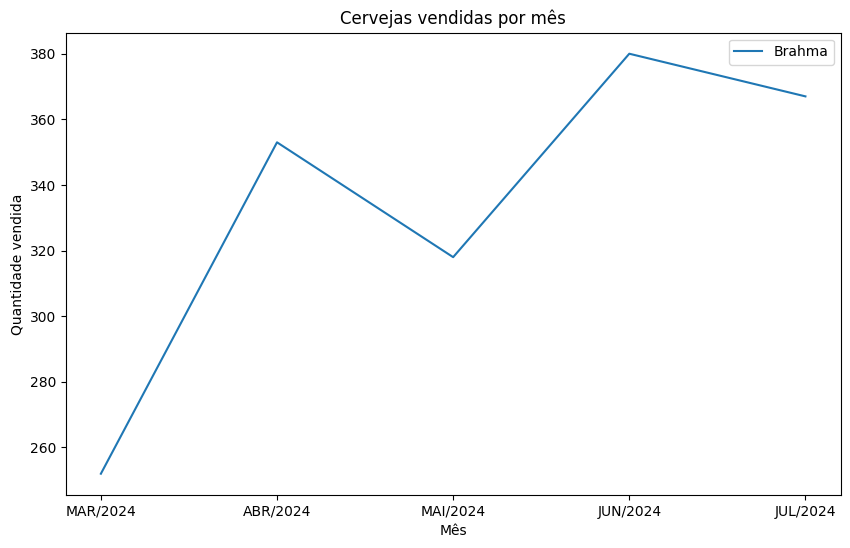

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))


brahma = cervejas_df[cervejas_df['Descrição'] == 'CERVEJA BRAHMA CHOPP LATA 350ML']

ax.plot(brahma.columns[1:-2], brahma.values[0][1:-2], label='Brahma')
ax.set_title('Cervejas vendidas por mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade vendida')
ax.legend()

plt.show()

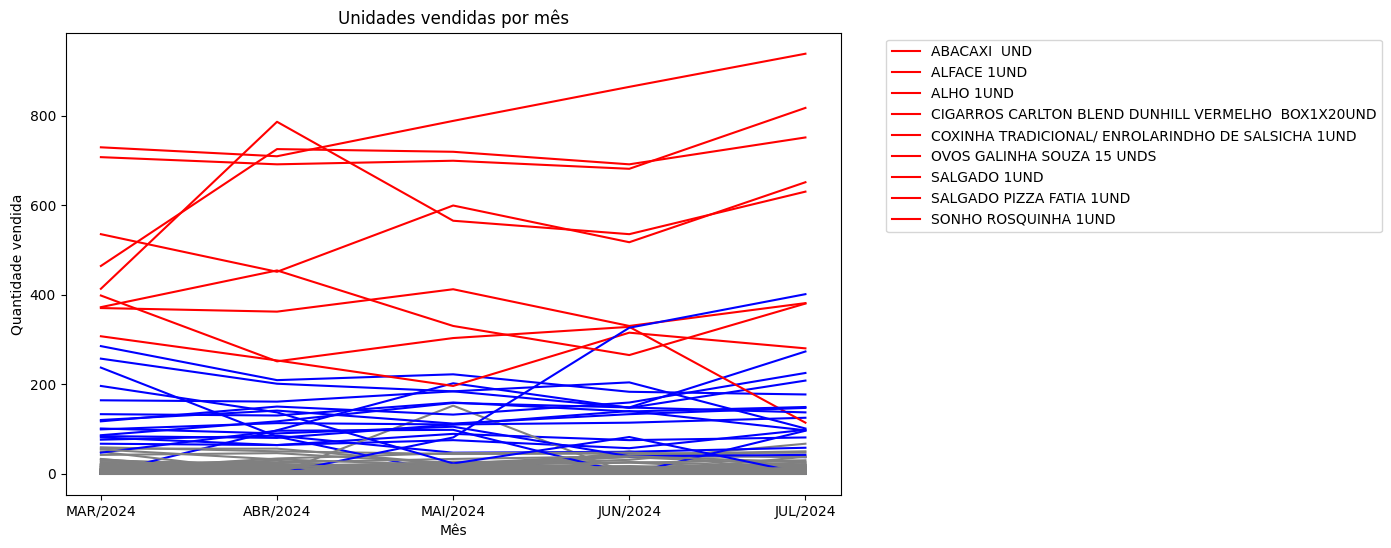

In [45]:
# df tal que descrição contém 'und' ou 'UND'
und_df = df[df['Descrição'].str.contains('und|UND')].loc[:, ['Descrição', 'MAR/2024', 'ABR/2024', 'MAI/2024', 'JUN/2024', 'JUL/2024', 'AGO/2024', 'Estoque Atual']]

# plot all units
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(und_df)):
    # only put label on the ones with 300+ sells
    # only put color on the ones with 400+ sells
    if und_df.values[i][1:-2].sum() > 1200:
        ax.plot(und_df.columns[1:-2], und_df.values[i][1:-2], label=und_df.values[i][0], color='red')
    elif und_df.values[i][1:-2].sum() > 300:
        ax.plot(und_df.columns[1:-2], und_df.values[i][1:-2], color='blue')
    else:
        ax.plot(und_df.columns[1:-2], und_df.values[i][1:-2], color='grey')

ax.set_title('Unidades vendidas por mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade vendida')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

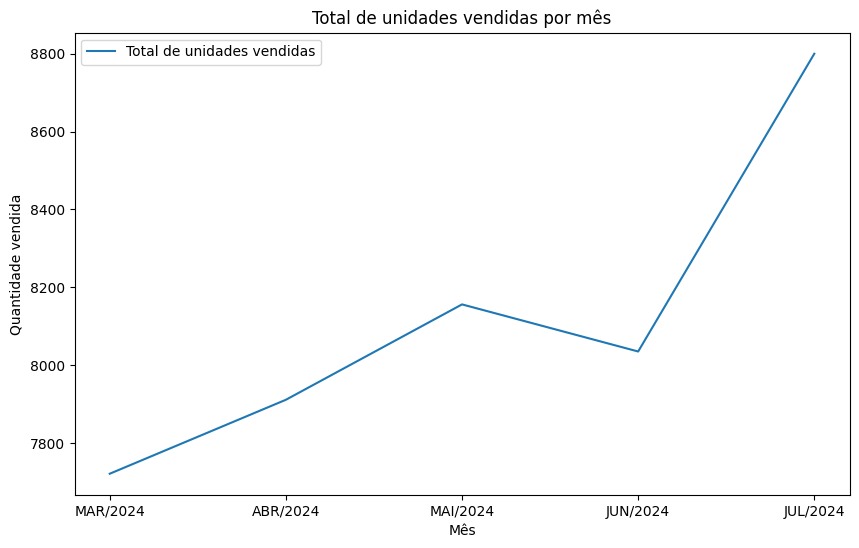

In [53]:
# soma das unidades de todos os produtos vendidas por cada mês
und_df_sum = und_df.sum(axis=0)
und_df_sum = und_df_sum[1:-3]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(und_df_sum.index, und_df_sum.values, label='Total de unidades vendidas')
ax.set_title('Total de unidades vendidas por mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade vendida')
ax.legend()

plt.show()

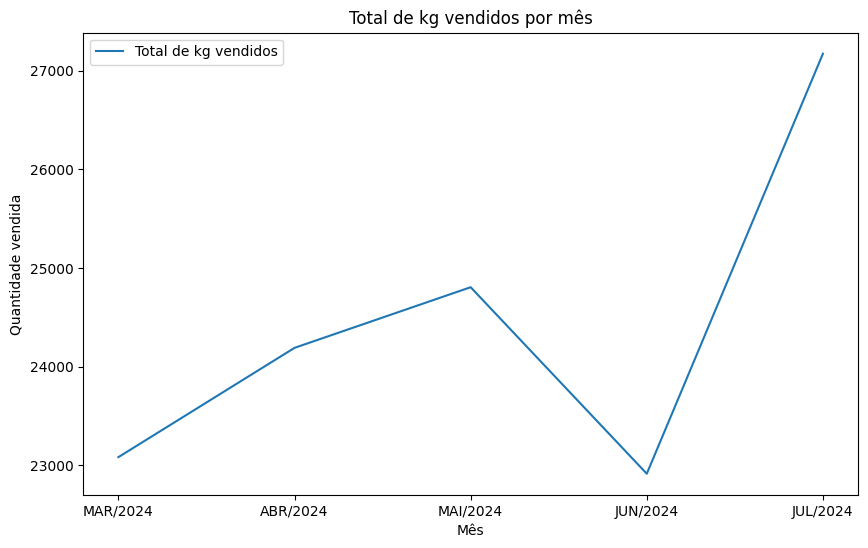

In [55]:
# soma dos kg de todos os produtos vendidos por cada mês
kg_df = df[df['Descrição'].str.contains('KG')].loc[:, ['Descrição', 'MAR/2024', 'ABR/2024', 'MAI/2024', 'JUN/2024', 'JUL/2024', 'AGO/2024', 'Estoque Atual']]
kg_df_sum = kg_df.sum(axis=0)
kg_df_sum = kg_df_sum[1:-2]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(kg_df_sum.index, kg_df_sum.values, label='Total de kg vendidos')
ax.set_title('Total de kg vendidos por mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade vendida')
ax.legend()

plt.show()